In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import os

In [2]:
folder_name = '/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/intelligent_bidding/data/RL_data/sensitivity_analysis'
file_type = "csv"
dataframe = pd.concat([pd.read_csv(f) for f in glob.glob(folder_name + "/*."+file_type)],ignore_index=True)

list_csv = []
for f in glob.glob(folder_name + "/*."+file_type):
    max_bid = f.split("/")[-1].split("bid_")[-1].split("_DDPG")[0]
    tmp_df = pd.read_csv(f)
    tmp_df['max_bid'] = max_bid
    list_csv.append(tmp_df)
    

dataframe = pd.concat(list_csv)
dataframe['max_bid'] = pd.to_numeric(dataframe['max_bid'])
dataframe

,Wall time,Step,Value,max_bid
0,1.594026e+09,1000,74.138863,190
1,1.594027e+09,2000,74.938019,190
2,1.594027e+09,3000,33.138348,190
3,1.594028e+09,4000,38.314064,190
4,1.594029e+09,5000,37.499722,190
...,...,...,...,...
35,1.594053e+09,36000,83.604721,140
36,1.594054e+09,37000,81.500381,140
37,1.594055e+09,38000,80.658630,140
38,1.594056e+09,39000,81.093369,140


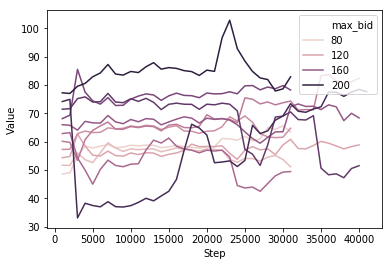

In [3]:
sns.lineplot(data=dataframe, x="Step", y="Value", hue="max_bid")

In [4]:
dataframe[dataframe.Step==max(dataframe.Step)]

,Wall time,Step,Value,max_bid
40,1.594057e+09,41000,77.661201,190


Text(3.799999999999997, 0.5, 'Average accepted bid (£/MWh)')

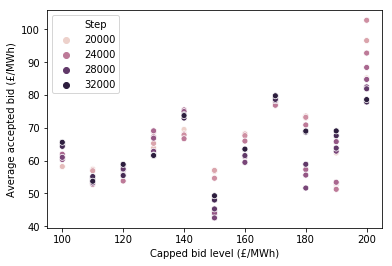

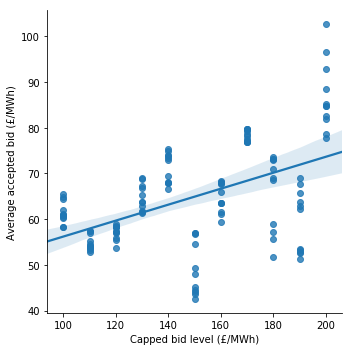

In [5]:
sns.scatterplot(data=(dataframe[(dataframe.Step>=20000) & (dataframe.Step<=30000)]), x="max_bid", y="Value", hue="Step")
plt.xlabel("Capped bid level (£/MWh)")
plt.ylabel("Average accepted bid (£/MWh)")
sns.lmplot(data=dataframe[(dataframe.Step>=20000) & (dataframe.Step<=30000)], x="max_bid", y="Value")
plt.xlabel("Capped bid level (£/MWh)")
plt.ylabel("Average accepted bid (£/MWh)")

In [6]:
dataframe.to_csv("/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/intelligent_bidding/data/processed/sensitivity_analysis/sensitivity_analysis_results.csv")